<a href="https://colab.research.google.com/github/Mztaroys/Falcon-9-prediction/blob/main/Used_Car_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('train.csv')

In [4]:
df.head(10)

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500
5,5,Audi,A6 2.0T Sport,2018,40950,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,White,–,None reported,Yes,29950
6,6,Audi,A8 L 3.0T,2016,62200,Gasoline,333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,Black,Black,None reported,Yes,28500
7,7,Chevrolet,Silverado 1500 1LZ,2016,102604,E85 Flex Fuel,355.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,White,Gray,None reported,Yes,12500
8,8,Ford,F-150 XLT,2020,38352,Gasoline,2.7L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,Snowflake White Pearl Metallic,Black,None reported,Yes,62890
9,9,BMW,M4 Base,2015,74850,Gasoline,425.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Black,Blue,None reported,Yes,4000


In [5]:
df.drop('id', axis=1, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   brand         188533 non-null  object
 1   model         188533 non-null  object
 2   model_year    188533 non-null  int64 
 3   milage        188533 non-null  int64 
 4   fuel_type     183450 non-null  object
 5   engine        188533 non-null  object
 6   transmission  188533 non-null  object
 7   ext_col       188533 non-null  object
 8   int_col       188533 non-null  object
 9   accident      186081 non-null  object
 10  clean_title   167114 non-null  object
 11  price         188533 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 17.3+ MB


In [7]:
df.isnull().sum()

,0
brand,0
model,0
model_year,0
milage,0
fuel_type,5083
engine,0
transmission,0
ext_col,0
int_col,0
accident,2452


In [8]:
print(df['clean_title'].value_counts(dropna=False))


clean_title
Yes    167114
NaN     21419
Name: count, dtype: int64


In [9]:
# Fill missing fuel_type with most common value
df['fuel_type'].fillna(df['fuel_type'].mode()[0], inplace=True)

# Fill accident with most common value
df['accident'].fillna(df['accident'].mode()[0], inplace=True)

/tmp/ipython-input-1118929191.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['fuel_type'].fillna(df['fuel_type'].mode()[0], inplace=True)
/tmp/ipython-input-1118929191.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace

In [10]:
df['clean_title_flag'] = df['clean_title'].apply(lambda x: 1 if x == 'Yes' else 0)

In [11]:
df.groupby('clean_title_flag')['price'].mean()

,price
clean_title_flag,
0,63567.566273
1,41354.406704


In [12]:
df['clean_title_flag'].value_counts(dropna=False)

,count
clean_title_flag,
1,167114
0,21419


not expected! could it be data collection error or high price for slighty-damaged but quality cars? let's check the brands... how many damaged per brand? since we cant check the quality of the damage.

In [13]:
# Standardize accident column to 'Yes' or 'No'
df['accident'] = df['accident'].astype(str).str.strip().str.lower()

df['accident'] = df['accident'].apply(lambda x: 'Yes' if 'accident' in x or 'damage' in x else 'No')

df.head()


,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,clean_title_flag
0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,No,Yes,4200,1
1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,Yes,Yes,4999,1
2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,No,Yes,13900,1
3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,No,Yes,45000,1
4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,No,Yes,97500,1


In [14]:
df['clean_title']

,clean_title
0,Yes
1,Yes
2,Yes
3,Yes
4,Yes
...,...
188528,Yes
188529,Yes
188530,Yes
188531,NaN


In [15]:
# contex-aware inputation
# If a car has been in an accident → assume it doesn't have a clean title
# Otherwise → assume it does


In [16]:
#fill missing clean_title based on accident status
# Replace empty strings with actual NaN

def fix_clean_title(row):
    if pd.isna(row['clean_title_flag']) or row['clean_title_flag'] == '':
        if str(row['accident']).strip().lower() == 'yes':
            return 'No'
        else:
            return 'Yes'
    else:
        return row['clean_title_flag']

df['clean_title_flag'] = df.apply(fix_clean_title, axis=1)

In [17]:
print(df['clean_title_flag'].value_counts())

clean_title_flag
1    167114
0     21419
Name: count, dtype: int64


<Axes: xlabel='clean_title_flag'>

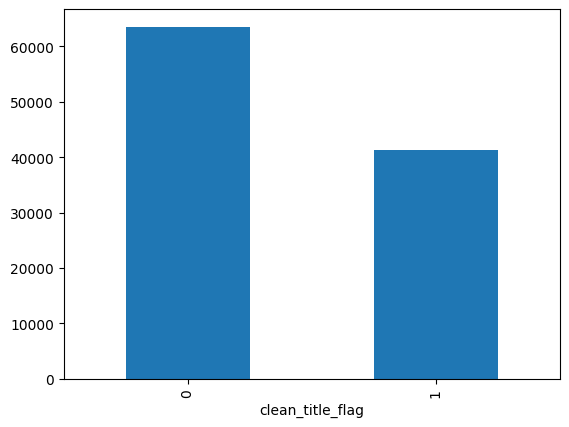

In [18]:
#price vs clean_title FOR CORELLATION WITH PRICE
df.groupby('clean_title_flag')['price'].mean().plot(kind='bar')

In [19]:
print(df['clean_title_flag'].value_counts(dropna=False))

clean_title_flag
1    167114
0     21419
Name: count, dtype: int64


<Axes: xlabel='accident'>

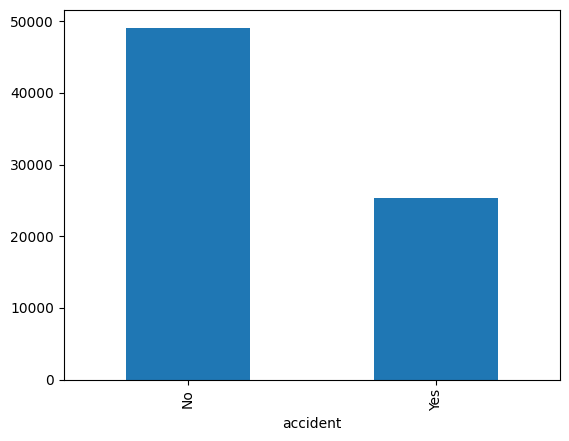

In [20]:
df.groupby('accident')['price'].mean().plot(kind='bar')

In [21]:
#Let’s explore how accident and clean_title affect other variables like price, mileage, or year.

# Average price by clean_title
df.groupby('clean_title_flag')['price'].mean()

# Accident vs clean_title cross-tab
pd.crosstab(df['accident'], df['clean_title_flag'])

clean_title_flag,0,1
accident,,
No,20265,126701
Yes,1154,40413


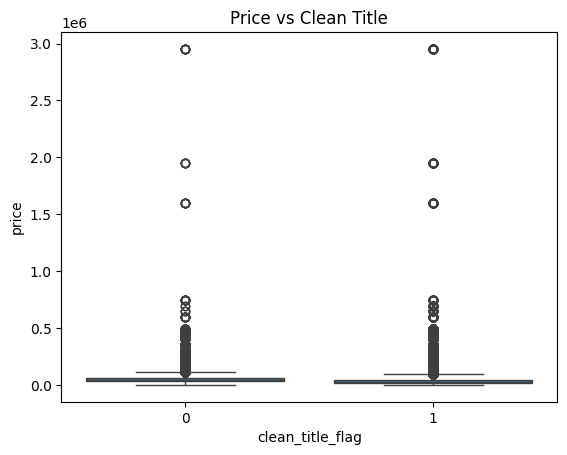

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Price distribution by clean_title
sns.boxplot(x='clean_title_flag', y='price', data=df)
plt.title('Price vs Clean Title')
plt.show()

- Now clean title sounds right. Buyers are willing to pay more for the assurance that a car hasn’t been in a major accident or had serious repairs and has clean title


In [23]:
print('Clean Title Categories:', df['clean_title_flag'].unique())
print('Accident Categories  :', df['accident'].unique())

Clean Title Categories: [1 0]
Accident Categories  : ['No' 'Yes']


In [24]:
import numpy as np

# Fill any true missing values with a placeholder
df['clean_title'] = df['clean_title'].fillna('unknown')
df['accident']    = df['accident'].fillna('none reported')

# Lowercase, strip whitespace
df['clean_title'] = df['clean_title'].astype(str).str.strip().str.lower()
df['accident']    = df['accident'].astype(str).str.strip().str.lower()

In [25]:
df = df.apply(lambda col: col.str.strip().str.lower() if col.dtype == 'object' else col)

In [26]:
binary_map = {'yes': 1, 'no': 0}
df['accident'] = df['accident'].map(binary_map)

In [27]:
df = pd.get_dummies(df, columns=[
    'brand', 'model', 'fuel_type', 'transmission', 'ext_col', 'int_col'
], drop_first=True)

df = df.astype({col: int for col in df.columns if df[col].dtype == 'bool'})



In [28]:
df.fillna('unknown', inplace=True)
print(df.info())
(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Columns: 2478 entries, model_year to int_col_–
dtypes: int64(2476), object(2)
memory usage: 3.5+ GB
None


,model_year,milage,engine,accident,clean_title,price,clean_title_flag,brand_alfa,brand_aston,brand_audi,...,int_col_titan black,int_col_titan black / quarzit,int_col_tupelo,int_col_very light cashmere,int_col_walnut,int_col_whisper beige,int_col_white,int_col_white / brown,int_col_yellow,int_col_–
0,2007,213000,172.0hp 1.6l 4 cylinder engine gasoline fuel,0,yes,4200,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2002,143250,252.0hp 3.9l 8 cylinder engine gasoline fuel,1,yes,4999,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2002,136731,320.0hp 5.3l 8 cylinder engine flex fuel capab...,0,yes,13900,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2017,19500,420.0hp 5.0l 8 cylinder engine gasoline fuel,0,yes,45000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2021,7388,208.0hp 2.0l 4 cylinder engine gasoline fuel,0,yes,97500,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
df.drop(columns=['clean_title'], inplace=True)

In [30]:
df['car_age'] = 2025 - df['model_year']

/tmp/ipython-input-1449616999.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['car_age'] = 2025 - df['model_year']


In [31]:
import re

# Horsepower
df['horsepower'] = df['engine'].str.extract(r'(\d+\.?\d*)hp').astype(float)

# Engine size in litres
df['engine_size_l'] = df['engine'].str.extract(r'(\d+\.?\d*)l').astype(float)

# Cylinder count
df['cylinders'] = df['engine'].str.extract(r'(\d+)\s*cylinder').astype(float)

# Fuel type
df['fuel_type_extracted'] = df['engine'].str.extract(r'(gasoline|diesel|petrol|electric|hybrid)', flags=re.IGNORECASE)
df['fuel_type_extracted'] = df['fuel_type_extracted'].str.lower().fillna('unknown')

/tmp/ipython-input-681783909.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['horsepower'] = df['engine'].str.extract(r'(\d+\.?\d*)hp').astype(float)
/tmp/ipython-input-681783909.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['engine_size_l'] = df['engine'].str.extract(r'(\d+\.?\d*)l').astype(float)
/tmp/ipython-input-681783909.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at onc

In [32]:
df.head()

,model_year,milage,engine,accident,price,clean_title_flag,brand_alfa,brand_aston,brand_audi,brand_bentley,...,int_col_whisper beige,int_col_white,int_col_white / brown,int_col_yellow,int_col_–,car_age,horsepower,engine_size_l,cylinders,fuel_type_extracted
0,2007,213000,172.0hp 1.6l 4 cylinder engine gasoline fuel,0,4200,1,0,0,0,0,...,0,0,0,0,0,18,172.0,1.6,4.0,gasoline
1,2002,143250,252.0hp 3.9l 8 cylinder engine gasoline fuel,1,4999,1,0,0,0,0,...,0,0,0,0,0,23,252.0,3.9,8.0,gasoline
2,2002,136731,320.0hp 5.3l 8 cylinder engine flex fuel capab...,0,13900,1,0,0,0,0,...,0,0,0,0,0,23,320.0,5.3,8.0,unknown
3,2017,19500,420.0hp 5.0l 8 cylinder engine gasoline fuel,0,45000,1,0,0,0,0,...,0,0,0,0,0,8,420.0,5.0,8.0,gasoline
4,2021,7388,208.0hp 2.0l 4 cylinder engine gasoline fuel,0,97500,1,0,0,0,0,...,0,0,0,0,0,4,208.0,2.0,4.0,gasoline


In [33]:
df.drop(columns=['engine'], inplace=True)

In [34]:

#df = pd.get_dummies(df, columns=['fuel_type_extracted'], drop_first=True)

# Convert boolean columns to 0/1
#df = df.astype({col: int for col in df.columns if df[col].dtype == 'bool'})

In [35]:
df.head()

,model_year,milage,accident,price,clean_title_flag,brand_alfa,brand_aston,brand_audi,brand_bentley,brand_bmw,...,int_col_whisper beige,int_col_white,int_col_white / brown,int_col_yellow,int_col_–,car_age,horsepower,engine_size_l,cylinders,fuel_type_extracted
0,2007,213000,0,4200,1,0,0,0,0,0,...,0,0,0,0,0,18,172.0,1.6,4.0,gasoline
1,2002,143250,1,4999,1,0,0,0,0,0,...,0,0,0,0,0,23,252.0,3.9,8.0,gasoline
2,2002,136731,0,13900,1,0,0,0,0,0,...,0,0,0,0,0,23,320.0,5.3,8.0,unknown
3,2017,19500,0,45000,1,0,0,0,0,0,...,0,0,0,0,0,8,420.0,5.0,8.0,gasoline
4,2021,7388,0,97500,1,0,0,0,0,0,...,0,0,0,0,0,4,208.0,2.0,4.0,gasoline


In [ ]:
#df = pd.get_dummies(df, columns=['fuel_type_extracted'], drop_first=True)
df.drop(columns=['model_year', 'fuel_type_extracted'], inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define features (X) and target (y)
X = df.drop('price', axis=1)
y = df['price']

# Handle any non-numeric columns that might have slipped through (e.g., 'fuel_type_extracted' before get_dummies was re-enabled)
X = X.select_dtypes(include=np.number)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Now that the data is split, let's train a Linear Regression model.

In [ ]:
# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")